# Lecture: Complex Network Analysis

Prof. Dr. Michael Gertz

Winter Semester 2021/22

## Assignment 6 - Degree Correlations and Assortativity

Students: Felix Hausberger, Nils Krehl, Patrick Günther

In [1]:
import math
import networkx as nx
import pandas as pd
import numpy as np
from scipy.special import zeta
from scipy import stats
import igraph
import matplotlib.pyplot as plt

In [2]:
# load dataset
data = pd.read_csv('facebook-links.txt', sep="\t", header=None, names=["source", "target", "timestamp"])

In [3]:
# clean dataset

# 1. remove time-stamp column
data = data.drop(["timestamp"], axis=1)

In [4]:
# 2. Turn the directed network into an undirected network. = done by using Graph() instead of DiGraph()
# 3. remove multiple edges = done by using Graph() instead of MultiGraph()
G = nx.Graph()
G.add_edges_from(data.itertuples(index=False))

# 1. Compute the average number of friends and the average number of "friends of friends" (FOF).

## 1.1 Average number of friends

A friend relationship is described by an edge between two nodes. The number of friends of one person (node) is equal to the degree of the node. The average number of friends is then the average degree $<k>$.

In [5]:
node_degrees = np.array(list(G.degree))
degrees = node_degrees[:,1]
average_degree = np.sum(degrees) / degrees.shape[0]

print("Average number of friends (average degree) = {}".format(average_degree))

Average number of friends (average degree) = 25.641838351822503


## 1.2 Average number of "friends of friends" (FOF)

In [6]:
number_friends_of_friend_per_node = []

for node in G.nodes():
    #print(node)
    #print(G.nodes[node])
    friends = G.neighbors(node)
    #print(list(friends))
    friends_of_friend = []
    for friend in friends:
        #print(G.degree[friend])
        friends_of_friend.append(G.degree[friend])
    average_number_friends_of_friend = np.sum(np.array(friends_of_friend)) / len(friends_of_friend)
    number_friends_of_friend_per_node.append(average_number_friends_of_friend)

average_number_friends_of_friend = np.sum(np.array(number_friends_of_friend_per_node)) / len(number_friends_of_friend_per_node)
print("Average number of friends of friends = {}".format(average_number_friends_of_friend))

Average number of friends of friends = 58.3634028072132


# 2. Create a plot showing the distribution of number of friends versus the number of FOF.

We created two plots for this. The first is a normal histogram without loglog binning. As expected it is not very meaningful. Secondly we created a plot with loglog binning and received a better plot.

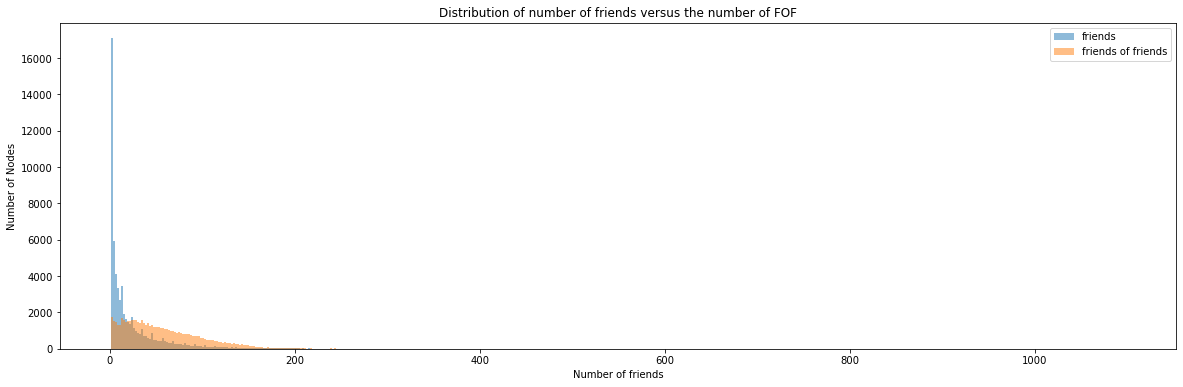

In [7]:
plt.figure(figsize=(20, 6))
plt.hist(degrees, 500, alpha=0.5, label='friends')#, density=True)
plt.hist(number_friends_of_friend_per_node, 500, alpha=0.5, label='friends of friends')#, density=True)
plt.legend(loc='upper right')

plt.title("Distribution of number of friends versus the number of FOF")
plt.xlabel("Number of friends")
plt.ylabel("Number of Nodes")
plt.show()

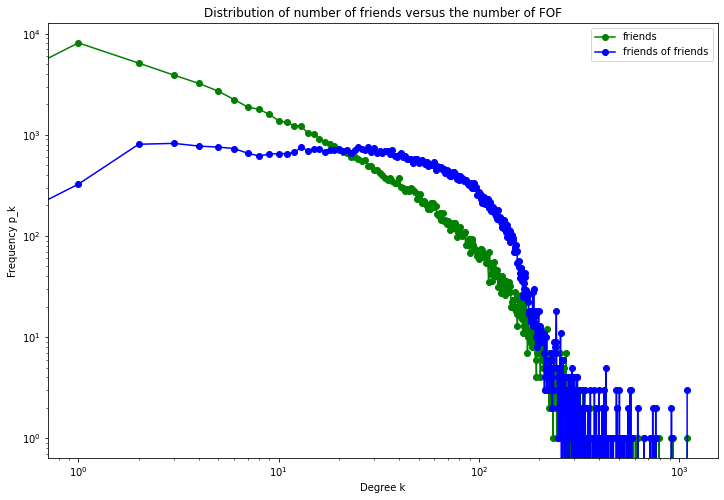

In [40]:
# degree_freq = how many nodes have this (index) number of links
# number_degrees = degree number from 0 up to the maximum degree
degree_freq = nx.degree_histogram(G)
number_friends_of_friend_per_node_freq = np.bincount(number_friends_of_friend_per_node)

number_degrees = range(max(len(degree_freq), max(number_friends_of_friend_per_node)))

plt.figure(figsize=(12, 8))
plt.loglog(number_degrees, degree_freq,'go-', label="friends")
plt.loglog(number_degrees, number_friends_of_friend_per_node_freq,'bo-', label="friends of friends")
plt.title("Distribution of number of friends versus the number of FOF")
plt.xlabel('Degree k')
plt.ylabel('Frequency p_k')
plt.legend()

# 3. Repeat the above tasks for a network based on the Barabási-Albert Model with n = 10,000 and m = 7. Discuss and compare the results with that for the Facebook network.

In [42]:
G_barabasi_albert = nx.barabasi_albert_graph(10000,7)